<a href="https://colab.research.google.com/github/Kbcity1/checkpoint/blob/master/CW_TIME_SERIES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TIME SERIES

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [39]:
data = pd.read_csv('/content/supermarket_sales.csv')
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [40]:
#The problem statement predict the
df = data[['Total']]
df['DateTime'] = data['Date'].astype(str) + ' ' + data['Time'].astype(str)
df.rename(columns = {'Total':'Sales'}, inplace = True)
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.sort_values(by = 'DateTime', ascending = True, inplace = True)
df.reset_index(drop = True, inplace = True)
df.head()

,Sales,DateTime
0,457.443,2019-01-01 10:39:00
1,888.615,2019-01-01 11:36:00
2,184.086,2019-01-01 11:40:00
3,132.027,2019-01-01 11:43:00
4,621.243,2019-01-01 13:55:00


In [41]:
#to resample the data the Datetime has to be index
df.set_index('DateTime', inplace = True, drop= True)
df2 = df.resample('H').sum()
df2

,Sales
DateTime,
2019-01-01 10:00:00,457.443
2019-01-01 11:00:00,1204.728
2019-01-01 12:00:00,0.000
2019-01-01 13:00:00,621.243
2019-01-01 14:00:00,1179.066
...,...
2019-03-30 16:00:00,196.140
2019-03-30 17:00:00,947.898
2019-03-30 18:00:00,0.000


<Axes: xlabel='DateTime', ylabel='Sales'>

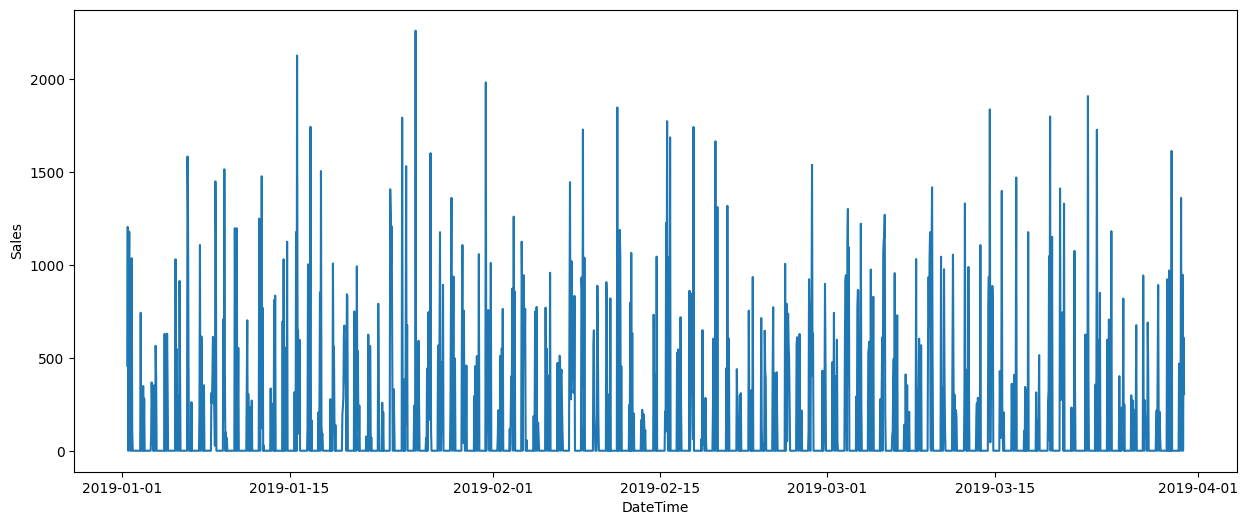

In [42]:
plt.figure(figsize= (15,6))
sns.lineplot(x = df2.index, y = df2['Sales'], ci = 0)

In [43]:
!pip install prophet

In [44]:
#it is imortant to note that when using prophet the following should be noted:
#date variable be renamed as ds
#response variable as Y
from prophet import Prophet
model = Prophet()
df

,Sales
DateTime,
2019-01-01 10:39:00,457.443
2019-01-01 11:36:00,888.615
2019-01-01 11:40:00,184.086
2019-01-01 11:43:00,132.027
2019-01-01 13:55:00,621.243
...,...
2019-03-30 16:34:00,196.140
2019-03-30 17:04:00,338.310
2019-03-30 17:58:00,609.588


In [45]:
#now we remove dataTime from index to normal column
prophetData = df2.copy()
prophetData.reset_index(inplace = True)
prophetData

,DateTime,Sales
0,2019-01-01 10:00:00,457.443
1,2019-01-01 11:00:00,1204.728
2,2019-01-01 12:00:00,0.000
3,2019-01-01 13:00:00,621.243
4,2019-01-01 14:00:00,1179.066
...,...,...
2118,2019-03-30 16:00:00,196.140
2119,2019-03-30 17:00:00,947.898
2120,2019-03-30 18:00:00,0.000
2121,2019-03-30 19:00:00,609.168


In [46]:
#renameing the column to meet the conditions of the prophet algorithm
prophetData.rename(columns = {'DateTime':'ds', 'Sales':'y'}, inplace = True)
prophetData

,ds,y
0,2019-01-01 10:00:00,457.443
1,2019-01-01 11:00:00,1204.728
2,2019-01-01 12:00:00,0.000
3,2019-01-01 13:00:00,621.243
4,2019-01-01 14:00:00,1179.066
...,...,...
2118,2019-03-30 16:00:00,196.140
2119,2019-03-30 17:00:00,947.898
2120,2019-03-30 18:00:00,0.000
2121,2019-03-30 19:00:00,609.168


In [47]:
#splitting our data to train and test
trainset = prophetData.loc[prophetData.ds <= '2019-03-01']
testset = prophetData.loc[prophetData.ds > '2019-03-01']
testset.index.min()

1407

Text(0.5, 1.0, 'Train Test Split')

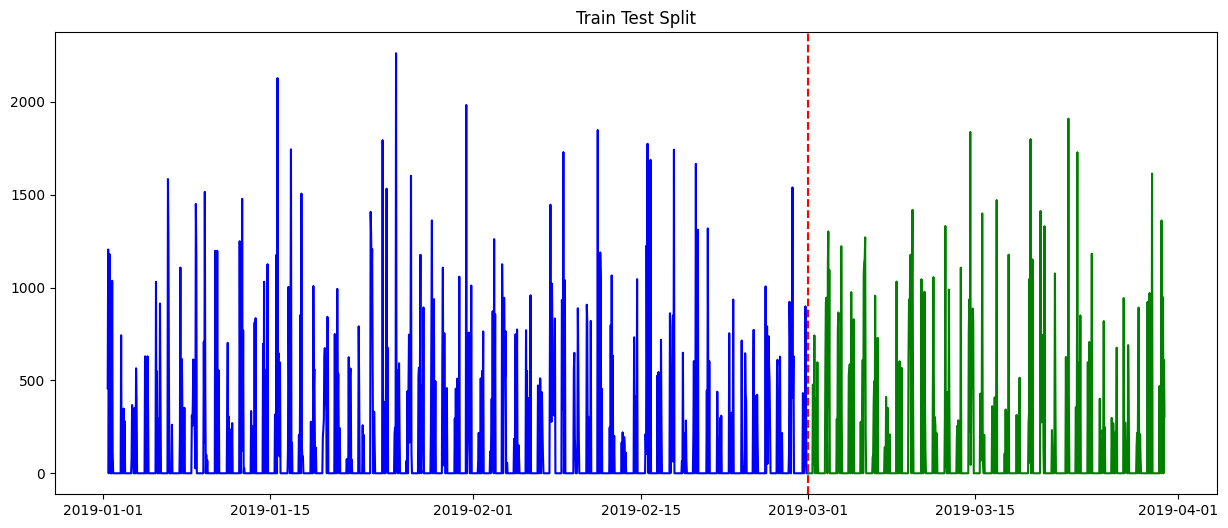

In [48]:
#visualize the split
plt.figure(figsize = (15,6))
#plot for the train set
plt.plot(trainset.ds, trainset.y, color = 'blue')
#plot for the test set
plt.plot(testset.ds, testset.y, color = 'green')

#to create the line that separate the trent
plt.axvline(x = pd.to_datetime('2019-03-01'), color = 'red', linestyle = '--')
plt.title('Train Test Split')

In [49]:
model.fit(trainset)

#predict the test set
modelpredict_test = model.predict(testset)
modelpredict_test.head()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsdaxy2gw/5dz5jfnt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsdaxy2gw/wb61l52v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94730', 'data', 'file=/tmp/tmpsdaxy2gw/5dz5jfnt.json', 'init=/tmp/tmpsdaxy2gw/wb61l52v.json', 'output', 'file=/tmp/tmpsdaxy2gw/prophet_modelwoxjuaix/prophet_model-20241205161041.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:10:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:10:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-03-01 01:00:00,133.646004,-403.650395,377.747957,133.646004,133.646004,-155.201344,-155.201344,-155.201344,-155.540573,-155.540573,-155.540573,0.339229,0.339229,0.339229,0.0,0.0,0.0,-21.555340
1,2019-03-01 02:00:00,133.605484,-374.492043,360.457098,133.605484,133.605484,-141.096086,-141.096086,-141.096086,-140.608352,-140.608352,-140.608352,-0.487734,-0.487734,-0.487734,0.0,0.0,0.0,-7.490602
2,2019-03-01 03:00:00,133.564965,-393.043342,394.834605,133.564965,133.564965,-137.300380,-137.300380,-137.300380,-135.909276,-135.909276,-135.909276,-1.391104,-1.391104,-1.391104,0.0,0.0,0.0,-3.735415
3,2019-03-01 04:00:00,133.524445,-388.327749,367.557505,133.524445,133.524445,-145.291815,-145.291815,-145.291815,-142.932738,-142.932738,-142.932738,-2.359077,-2.359077,-2.359077,0.0,0.0,0.0,-11.767370
4,2019-03-01 05:00:00,133.483925,-405.100672,329.696522,133.483925,133.483925,-162.522129,-162.522129,-162.522129,-159.143383,-159.143383,-159.143383,-3.378746,-3.378746,-3.378746,0.0,0.0,0.0,-29.038204


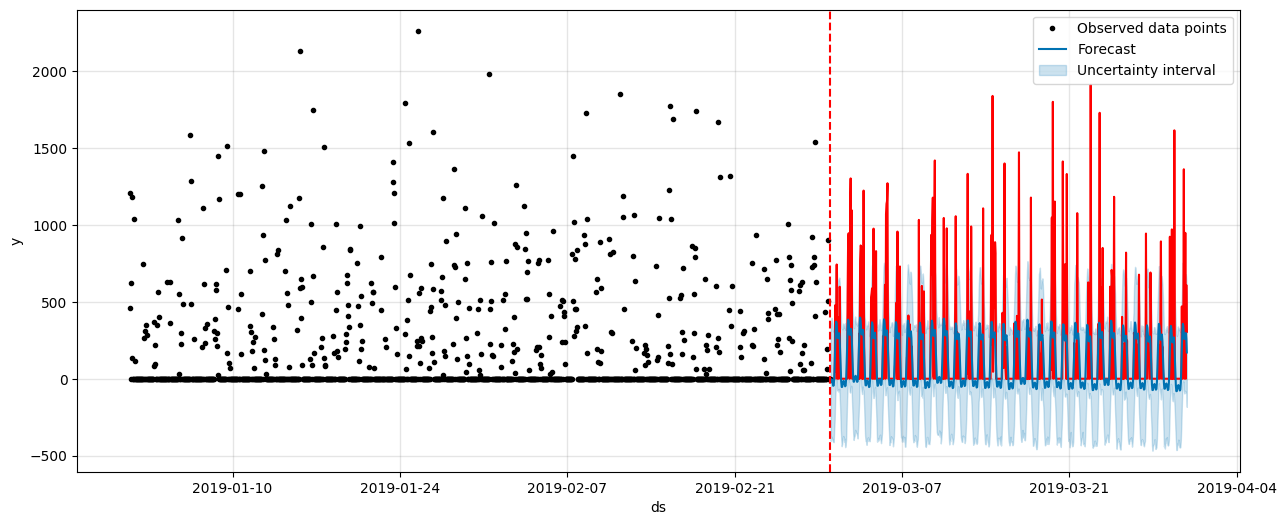

In [56]:
#visualizing the train and test
f, ax = plt.subplots(figsize = (15,6))
ax.plot(testset.ds, testset.y, color = 'red')
fig = model.plot(modelpredict_test, ax = ax)
plt.axvline(x = pd.to_datetime('2019-03-01'), color = 'red', linestyle = '--')

plt.legend()

In [57]:
#the train tail
trainset.tail()

,ds,y
1402,2019-02-28 20:00:00,507.906
1403,2019-02-28 21:00:00,0.000
1404,2019-02-28 22:00:00,0.000
1405,2019-02-28 23:00:00,0.000
1406,2019-03-01 00:00:00,0.000


In [58]:
#future forcast
#period: number of times we want to forcast
#frequency: Aggrigateion (hourly, weekly, monthly,...)

model.make_future_dataframe(periods = 5, freq = 'H')

,ds
0,2019-01-01 10:00:00
1,2019-01-01 11:00:00
2,2019-01-01 12:00:00
3,2019-01-01 13:00:00
4,2019-01-01 14:00:00
...,...
1407,2019-03-01 01:00:00
1408,2019-03-01 02:00:00
1409,2019-03-01 03:00:00
1410,2019-03-01 04:00:00


In [59]:
futureModel = Prophet()
futureModel.fit(prophetData)
futureModel

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsdaxy2gw/gsl4nudm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsdaxy2gw/on6ipsmb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54007', 'data', 'file=/tmp/tmpsdaxy2gw/gsl4nudm.json', 'init=/tmp/tmpsdaxy2gw/on6ipsmb.json', 'output', 'file=/tmp/tmpsdaxy2gw/prophet_model9324oe75/prophet_model-20241205163204.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:32:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:32:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [60]:
prophetData.tail()

,ds,y
2118,2019-03-30 16:00:00,196.140
2119,2019-03-30 17:00:00,947.898
2120,2019-03-30 18:00:00,0.000
2121,2019-03-30 19:00:00,609.168
2122,2019-03-30 20:00:00,304.983


In [63]:
#predicting the data for the next 10hrs
future = futureModel.make_future_dataframe(periods = 72, freq = 'H')
future

,ds
0,2019-01-01 10:00:00
1,2019-01-01 11:00:00
2,2019-01-01 12:00:00
3,2019-01-01 13:00:00
4,2019-01-01 14:00:00
...,...
2190,2019-04-02 16:00:00
2191,2019-04-02 17:00:00
2192,2019-04-02 18:00:00
2193,2019-04-02 19:00:00


In [65]:
#predicting the
futurePredict = futureModel.predict(future)
futurePredict.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2190,2019-04-02 16:00:00,144.484026,-75.161677,662.669117,144.472112,144.495736,150.704288,150.704288,150.704288,136.893734,136.893734,136.893734,13.810553,13.810553,13.810553,0.0,0.0,0.0,295.188314
2191,2019-04-02 17:00:00,144.477237,-21.050090,719.360763,144.464412,144.489152,191.408511,191.408511,191.408511,177.817626,177.817626,177.817626,13.590885,13.590885,13.590885,0.0,0.0,0.0,335.885748
2192,2019-04-02 18:00:00,144.470447,14.704875,756.607710,144.457297,144.482301,220.494108,220.494108,220.494108,207.290953,207.290953,207.290953,13.203155,13.203155,13.203155,0.0,0.0,0.0,364.964554
2193,2019-04-02 19:00:00,144.463657,-32.190389,696.248409,144.450785,144.475986,187.874328,187.874328,187.874328,175.217636,175.217636,175.217636,12.656692,12.656692,12.656692,0.0,0.0,0.0,332.337985
2194,2019-04-02 20:00:00,144.456867,-117.560087,600.670719,144.443471,144.469529,86.749935,86.749935,86.749935,74.787461,74.787461,74.787461,11.962474,11.962474,11.962474,0.0,0.0,0.0,231.206802


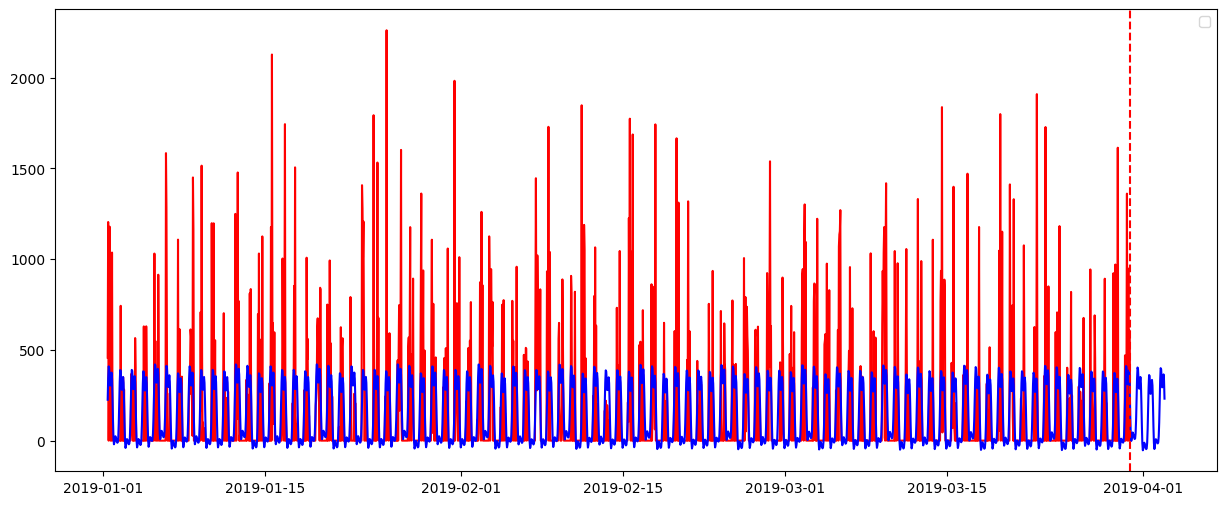

In [68]:
#visualizing the prediction
f, ax = plt.subplots(figsize = (15,6))
ax.plot(prophetData.ds, prophetData.y, color = 'red')
ax.plot(futurePredict.ds, futurePredict.yhat, color = 'blue')
plt.axvline(x = pd.to_datetime(prophetData.ds.max()), color = 'red', linestyle = '--')

plt.legend()